In [8]:
import sys
import os

# Add the parent directory to the Python path
parent_dir = os.path.abspath('../..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
# import modules
import ddsp_textures.dataset.makers
import ddsp_textures.auxiliar.features

# Extra packages
import random
import matplotlib.pyplot as plt
from IPython.display import Audio

# For dataset visualization
def random_viewer(dataset_sounds):
    size = len(dataset_sounds)
    file_number = random.randint(0, size-1)
    features = dataset_sounds[file_number][0]
    audio    = dataset_sounds[file_number][1].detach().cpu().numpy()
    plt.plot(audio)
    title = "feature 0: "+ str(features[0].detach().cpu().numpy())
    plt.title(title)
    plt.show()
    display(Audio(data=audio, rate=44100))

In [10]:
# Fire dataset creation

# Dataset parameters
audio_folder_path = ".."+"/sounds/fire_sounds"
frame_size        = 2**16 # 2**16 is around 1.5 seconds
hop_size          = 2**15 # samples are 50% overlapped
sampling_rate     = 44100
features_annotator = [ddsp_textures.auxiliar.features.features_freqavg] # for fire, the features will be sp centroid and rate
freq_avg_level = 4    # The spectral centroid will et more informative by pushing it a little
N_filter_bank = 16    # Number of filters in the filter bank

# Dataset creation
dataset_raw  = ddsp_textures.dataset.makers.DDSP_Dataset(audio_folder_path, frame_size, hop_size, sampling_rate, N_filter_bank, features_annotator)
dataset_fire = dataset_raw.compute_dataset()

# # Visualize M dataset samples
# M = 2
# print("\nVisualizing "+str(M)+" samples of the dataset")
# for i in range(M):
#     random_viewer(dataset_fire)

Audio loaded from  ../sounds/fire_sounds
Computing dataset
...
Dataset computed!


Audio loaded from  ../sounds/water.wav
Final dataset size will be:  275
Computing dataset
...
Dataset computed!

Visualizing 2 samples of the dataset


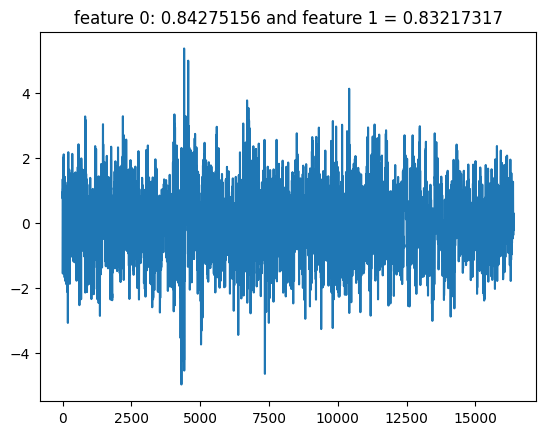

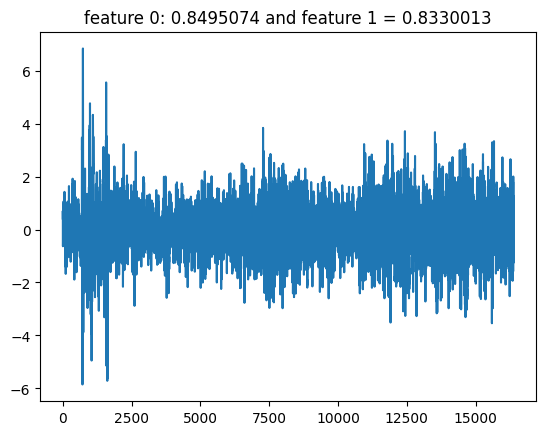

In [3]:
# # Water dataset creation

# # Dataset parameters
# audio_path    = ".."+"/sounds/water.wav"
# frame_size    = 2**14 # 2**14 is around 0.37 seconds
# hop_size      = 2**14
# sampling_rate = 44100
# features_annotator = ddsp_textures.auxiliar.features.features_freqavg_freqstd # for fire, the features will be sp centroid and rate
# freq_avg_level = 2   # The spectral centroid will et more informative by pushing it a little

# # Dataset creation
# dataset_raw  = ddsp_textures.dataset.makers.DDSP_Dataset(audio_path, frame_size, hop_size, sampling_rate, features_annotator, freq_avg_level)
# dataset_fire = dataset_raw.compute_dataset()

# # Visualize M dataset samples
# M = 2
# print("\nVisualizing "+str(M)+" samples of the dataset")
# for i in range(M):
#     random_viewer(dataset_fire)